# <font color='#d50283'>IT Academy - Ciència de Dades (online)</font>
## Tasca M1 T01: Exercicis amb MySQL
### Juan Javier Hidalgo Gómez

### <font color='#d50283'>- Generación del Entorno de trabajo</font>

In [1]:
import mysql.connector
from mysql.connector import errorcode

In [2]:
try:
 mydb = mysql.connector.connect(
    host="127.0.0.1"
    ,user="root"
    ,password="Juanja1967"
    #,database="pepe"
    #,port="3306"
    #,auth_plugin="mysql_native_password"
)

except mysql.connector.Error as err:
  if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
    print("Resultado:")
    print("Something is wrong with your user name or password")
  elif err.errno == errorcode.ER_BAD_DB_ERROR:
    print("Resultado:")
    print("Database does not exist")
  else:
    print("Resultado:")
    print("Número de error: ".err)
else:
    print("Resultado:")
    print("Conexión Ok")
     


Resultado:
Conexión Ok


In [3]:
_cursor=mydb.cursor()
_cursor.execute("show databases")
print("Resultado:")
for base in _cursor:
    print(base)
#### mydb.close() 

Resultado:
('datascience',)
('information_schema',)
('movies',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)
('world',)


In [72]:
_cursor.execute("use movies")
_cursor.execute("show tables")
print("Resultado:")
for tabla in _cursor:
    print(tabla)
#### mydb.close()  

Resultado:
('tb_genre',)
('tb_movie',)
('tb_movie_person',)
('tb_person',)
('tb_role',)


### <font color='#d50283'>- Exercici 1</font>
A partir dels documents adjunts (estructura i dades), crea una base de dades amb MySQL. Mostra les característiques principals de l'esquema creat i explica les diferents taules i variables que hi ha.

#### <font color='#00000'>- Diagrama Entidad Relación</font>

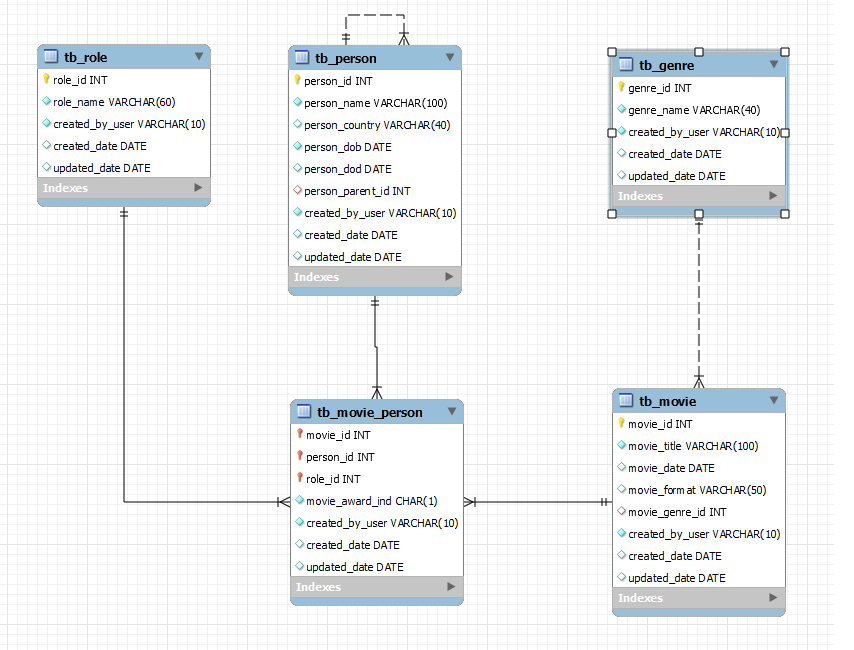

### <font color='#00000'>- Tabla "tb_movie_person"</font>

Tiene una cardinalidad de n:1. Está tabla realiza la función de "Tabla Relación", donde tenemos tres campos que nos relacionan las tablas "tb_movie, tb_person y tb_role",
los campos serían "movie_id, person_id, role_id". En este caso, estamos definiendo un PRIMARY KEY de tres campos, es decir, una clave primaria
compuesta.

Lo definimos con la siguiente instruccion:
#### <font color='#1D09FC'>CONSTRAINT pk_movper PRIMARY KEY (movie_id, person_id, role_id) </font>

Las siguientes instrucciones definen la clave secundaria, dando la referencia a la tabla origen
de los campos declarados.

#### <font color='#1D09FC'>CONSTRAINT fk_movper_movie FOREIGN KEY (movie_id) REFERENCES movies.tb_movie (movie_id)</font>
#### <font color='#1D09FC'>CONSTRAINT fk_movper_person FOREIGN KEY (person_id) REFERENCES movies.tb_person (person_id)</font>
#### <font color='#1D09FC'>CONSTRAINT fk_movper_role FOREIGN KEY (role_id) REFERENCES movies.tb_role (role_id)</font>

Otro campo interesante sería "created_by_user", donde le decimos que no puede ser NULL y por defecto
si no tiene valor, que le asigne 'OS_SGAD'
#### <font color='#1D09FC'>created_by_user  CHARACTER VARYING(10) NOT NULL DEFAULT 'OS_SGAD' </font>

El resto de campos de está tabla, son definidos como INT (números enteros), DATE (Fecha), CHAR (Caracteres)

In [17]:
_cursor.execute("desc movies.tb_movie_person")
myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)
for x in myresult:
  print (x)

Resultado:
('Field', 'Type', 'Null', 'Key', 'Default', 'Extra')
('movie_id', b'int', 'NO', 'PRI', None, '')
('person_id', b'int', 'NO', 'PRI', None, '')
('role_id', b'int', 'NO', 'PRI', None, '')
('movie_award_ind', b'char(1)', 'NO', '', None, '')
('created_by_user', b'varchar(10)', 'NO', '', b'OS_SGAD', '')
('created_date', b'date', 'YES', '', None, '')
('updated_date', b'date', 'YES', '', None, '')


### <font color='#00000'>- Tabla "tb_person"</font>

La característica de está tabla es que tiene una cardinalidad de n:1 sobre sí misma, donde el campo "person_parent_id" (n) se relaciona
con el campo "person_id" (1).

Definimos PRIMARY KEY el campo "person_id":
#### <font color='#1D09FC'>CONSTRAINT pk_person PRIMARY KEY (person_id)</font>

La siguiente instrucción define la clave secundaria, dando la referencia a la tabla origen
de los campos declarados, que en este caso es ella misma.

#### <font color='#1D09FC'>CONSTRAINT fk_person_parent FOREIGN KEY (person_parent_id) REFERENCES movies.tb_person (person_id)</font>

El resto de campos se definen como INT, DATE, etc..

In [18]:
_cursor.execute("desc movies.tb_person")
myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)
for x in myresult:
  print (x)

Resultado:
('Field', 'Type', 'Null', 'Key', 'Default', 'Extra')
('person_id', b'int', 'NO', 'PRI', None, '')
('person_name', b'varchar(100)', 'NO', '', None, '')
('person_country', b'varchar(40)', 'YES', '', None, '')
('person_dob', b'date', 'NO', '', None, '')
('person_dod', b'date', 'YES', '', None, '')
('person_parent_id', b'int', 'YES', 'MUL', None, '')
('created_by_user', b'varchar(10)', 'NO', '', b'OS_SGAD', '')
('created_date', b'date', 'YES', '', None, '')
('updated_date', b'date', 'YES', '', None, '')


### <font color='#00000'>- Tabla "tb_movie"</font>

La característica de está tabla es que tiene una cardinalidad de n:1 sobre la tabla "tb_genre"

Definimos PRIMARY KEY el campo "movie_id":
#### <font color='#1D09FC'>CONSTRAINT pk_movie PRIMARY KEY (movie_id) ,</font>

La siguiente instrucción define la clave secundaria.

#### <font color='#1D09FC'>CONSTRAINT fk_movie_genre FOREIGN KEY (movie_genre_id) REFERENCES movies.tb_genre (genre_id)</font>

El resto de campos se definen como INT, DATE, etc..


In [20]:
_cursor.execute("desc movies.tb_movie")
myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)
for x in myresult:
  print (x)

Resultado:
('Field', 'Type', 'Null', 'Key', 'Default', 'Extra')
('movie_id', b'int', 'NO', 'PRI', None, '')
('movie_title', b'varchar(100)', 'NO', '', None, '')
('movie_date', b'date', 'YES', '', None, '')
('movie_format', b'varchar(50)', 'YES', '', None, '')
('movie_genre_id', b'int', 'YES', 'MUL', None, '')
('created_by_user', b'varchar(10)', 'NO', '', b'OS_SGAD', '')
('created_date', b'date', 'YES', '', None, '')
('updated_date', b'date', 'YES', '', None, '')


#### NOTA:

#### El resto de tablas se definen de una manera similar.

### <font color='#d50283'>- Exercici 2</font>
Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir el nom, el país i la data de naixement d'aquelles persones per les quals no consti una data de mort i ordenar les dades de la persona més vella a la persona més jove.



In [73]:
#### mydb.close()
_cursor.execute("Select person_name as Nombre "+
",person_country as País "+
",convert(person_dob,char) as Fecha_Nacimiento "+
"from tb_person "+
"where person_dod is null "+
"order by person_dob asc;")
myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)
for x in myresult:
  print(x)

Resultado:
('Nombre', 'País', 'Fecha_Nacimiento')
('John Williams', 'United States', '1928-08-08')
('Vera Miles', 'United States', '1929-08-23')
('Sean Connery', 'Scotland', '1930-07-08')
('Robert Duvall', 'United States', '1931-01-05')
('Morgan Freeman', 'United States', '1935-10-01')
('Francis Ford Coppola', 'United States', '1939-04-07')
('Gary Kurtz', 'United States', '1940-07-27')
('Martin Sheen', 'United States', '1940-08-03')
('Harrison Ford', 'United States', '1942-07-13')
('George Lucas', 'United States', '1944-05-14')
('Carmine Coppola', 'United States', '1945-07-08')
('Steven Spielberg', 'United States', '1946-12-18')
('Tim Robbins', 'United States', '1949-06-07')
('Mel Gibson', 'Australia', '1950-08-09')
('Tom Hanks', 'United States', '1956-07-09')
('Emilio Martinez Lazaro', 'Spain', '1956-09-09')
('Karra Elejalde', 'Spain', '1960-03-06')
('Emilio Estevez', 'United States', '1962-05-12')
('Ramón Estevez', 'United States', '1963-08-07')
('Carmen Machi', 'Spain', '1964-08-09'

### <font color='#d50283'>- Exercici 3</font>
Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir el nom del gènere i el nombre total de pel·lícules d'aquest gènere i ordenar-ho per ordre descendent de nombre total de pel·lícules. 

In [74]:
_cursor.execute("select tb_genre.genre_name as Género_Película"+
",count(*) as Total "+
"from tb_genre inner join tb_movie "+
"on tb_genre.genre_id=tb_movie.movie_genre_id "+
"group by tb_genre.genre_name order by Total desc;")
myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)

for x in myresult:
  print(x)

#### mydb.close()

Resultado:
('Género_Película', 'Total')
('Comedia', 3)
('Acción', 2)
('Ciencia Ficción', 2)
('Drama', 2)
('Romance', 2)
('Suspense', 2)
('Fantasía', 1)
('Terror', 1)
('Bélico', 1)


### <font color='#d50283'>- Exercici 4</font>
Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir, per a cada persona, el seu nom i el nombre màxim de rols diferents que ha tingut en una mateixa pel·lícula. 

Posteriorment, mostra únicament aquelles persones que hagin assumit més d'un rol en una mateixa pel·lícula.

In [75]:
_cursor.execute("select tb_person.person_name as Nombre "+
",tb_movie.movie_title as Nombre_Película "+
",count(*) as Total_Roles "+
"from tb_person "+
"inner join tb_movie_person "+
"on tb_person.person_id=tb_movie_person.person_id "+
"inner join tb_movie "+
"on tb_movie_person.movie_id=tb_movie.movie_id "+
"inner join tb_role "+
"on tb_movie_person.role_id=tb_role.role_id "+
"group by tb_person.person_name "+
",tb_movie_person.movie_id "+
"order by Total_Roles desc;")
myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)

for x in myresult:
  print(x)

#### mydb.close()

Resultado:
('Nombre', 'Nombre_Película', 'Total_Roles')
('Alfred Joseph Hitchcock', 'Psycho', 3)
('Francis Ford Coppola', 'Apocalypse Now', 3)
('George Lucas', 'Indiana Jones and the Temple of Doom', 2)
('Mel Gibson', 'Braveheart', 2)
('Steven Spielberg', 'The Terminal', 2)
('Daniel Sanchez Arevalo', 'La Gran Familia Española', 2)
('Marlon Brando', 'Apocalypse Now', 1)
('Harrison Ford', 'Indiana Jones and the Temple of Doom', 1)
('Tom Hanks', 'The Terminal', 1)
('Catherine Zeta-Jones', 'The Terminal', 1)
('Harrison Ford', 'Star Wars:Episode IV - A New Hope', 1)
('Dani Rovira', 'Ocho Apellidos Vascos', 1)
('Clara Lago', 'Ocho Apellidos Vascos', 1)
('Carmen Machi', 'Ocho Apellidos Vascos', 1)
('Karra Elejalde', 'Ocho Apellidos Vascos', 1)
('Dani Rovira', 'Ocho Apellidos Catalanes', 1)
('Clara Lago', 'Ocho Apellidos Catalanes', 1)
('Carmen Machi', 'Ocho Apellidos Catalanes', 1)
('Karra Elejalde', 'Ocho Apellidos Catalanes', 1)
('Quim Gutierrez', 'La Gran Familia Española', 1)
('Robert Ala

In [76]:
_cursor.execute("select * from(select tb_person.person_name as Nombre "+
",tb_movie.movie_title as Nombre_Película "+
",count(*) as Total_Roles "+
"from tb_person "+
"inner join tb_movie_person "+
"on tb_person.person_id=tb_movie_person.person_id "+
"inner join tb_movie "+
"on tb_movie_person.movie_id=tb_movie.movie_id "+
"inner join tb_role "+
"on tb_movie_person.role_id=tb_role.role_id "+
"group by tb_person.person_name "+
",tb_movie_person.movie_id) as Resultado "+
"where Total_Roles>1 "+                
"order by Total_Roles desc;")
myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)

for x in myresult:
  print(x)

#### mydb.close()

Resultado:
('Nombre', 'Nombre_Película', 'Total_Roles')
('Alfred Joseph Hitchcock', 'Psycho', 3)
('Francis Ford Coppola', 'Apocalypse Now', 3)
('George Lucas', 'Indiana Jones and the Temple of Doom', 2)
('Mel Gibson', 'Braveheart', 2)
('Steven Spielberg', 'The Terminal', 2)
('Daniel Sanchez Arevalo', 'La Gran Familia Española', 2)


### <font color='#d50283'>- Exercici 5</font>
Realitza la següent operació sobre la base de dades acabada de crear: 

Has de crear un nou gènere anomenat "Documental" el qual tingui com a identificador el nombre 69.

#### <font color='#000000'>- Utilizamos la siguiente instrucción</font>

#### <font color='#1D09FC'>INSERT INTO movies.tb_genre (genre_id, genre_name) VALUES ( 69, 'Documental');</font>

#### <font color='#1D09FC'>commit;</font>

In [77]:
_cursor.execute("select *from tb_genre")
myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)
for x in myresult:
  print(x)

####mydb.close()

Resultado:
('genre_id', 'genre_name', 'created_by_user', 'created_date', 'updated_date')
(1, 'Acción', 'OS_SGAD', None, None)
(2, 'Ciencia Ficción', 'OS_SGAD', None, None)
(3, 'Comedia', 'OS_SGAD', None, None)
(4, 'Drama', 'OS_SGAD', None, None)
(5, 'Fantasía', 'apermag', None, None)
(6, 'Melodrama', 'apermag', datetime.date(2018, 9, 1), datetime.date(2018, 9, 27))
(7, 'Musical', 'OS_SGAD', None, None)
(8, 'Romance', 'OS_SGAD', None, None)
(9, 'Suspense', 'OS_SGAD', None, None)
(10, 'Terror', 'OS_SGAD', None, None)
(11, 'Bélico', 'OS_SGAD', None, None)
(69, 'Documental', 'OS_SGAD', None, None)


### <font color='#d50283'>- Exercici 6</font>

Fes la següent operació sobre la base de dades acabada de crear:  

Elimina la pel·lícula "La Gran Familia Española" de la base de dades.

#### <font color='#000000'>- Explicación:</font>
    
Debemos eliminar primero los registros de la tabla "tb_movie_person", ya que tenemos 
Foreing Key que no permite la eliminación del registro en la tabla "tb_movie"

#### <font color='#1D09FC'>delete from movies.tb_movie_person where movie_id=11</font>

In [84]:
_cursor.execute("SELECT * FROM movies.tb_movie_person WHERE movie_id=11;")
myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)
for x in myresult:
  print(x)

Resultado:
('movie_id', 'person_id', 'role_id', 'movie_award_ind', 'created_by_user', 'created_date', 'updated_date')


In [85]:
_cursor.execute("select * from movies.tb_movie where movie_title like ('La Gran Familia Española');")

myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)
for x in myresult:
  print(x)

Resultado:
('movie_id', 'movie_title', 'movie_date', 'movie_format', 'movie_genre_id', 'created_by_user', 'created_date', 'updated_date')
(11, 'La Gran Familia Española', datetime.date(2012, 10, 15), 'Digital', 3, 'OS_SGAD', None, None)


Despues de realizar la operación anterior, ahora podemos eliminar la película de
la "tb_movie".

#### <font color='#1D09FC'>delete from movies.tb_movie where movie_title="La Gran Familia Española"</font>
#### <font color='#1D09FC'>commit;</font>

In [52]:
_cursor.execute("select * from movies.tb_movie where movie_title like ('La Gran Familia Española');")

myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)
for x in myresult:
  print(x)

Resultado:
('movie_id', 'movie_title', 'movie_date', 'movie_format', 'movie_genre_id', 'created_by_user', 'created_date', 'updated_date')


### <font color='#d50283'>- Exercici 7</font>

Realitza la següent operació sobre la base de dades acabada de crear: 

Canvia el gènere de la pel·lícula "Ocho apellidos catalanes" perquè consti com a comèdia i no com a romàntica.

In [86]:
_cursor.execute("select tb_movie.movie_title "+
",tb_genre.genre_name "+
"from movies.tb_movie "+
"inner join movies.tb_genre "+
"on tb_movie.movie_genre_id=tb_genre.genre_id "+
"where movie_title like ('Ocho apellidos catalanes');")

myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)
for x in myresult:
  print(x)

Resultado:
('movie_title', 'genre_name')
('Ocho Apellidos Catalanes', 'Romance')


#### <font color='#000000'>- Modificación:</font>
#### <font color='#1D09FC'>update movies.tb_movie set tb_movie.movie_genre_id='3' where movie_title='Ocho apellidos catalanes';</font>
#### <font color='#1D09FC'>commit;</font>

In [91]:
_cursor.execute("select tb_movie.movie_title "+
",tb_genre.genre_name "+
"from movies.tb_movie "+
"inner join movies.tb_genre "+
"on tb_movie.movie_genre_id=tb_genre.genre_id "+
"where movie_title like ('Ocho apellidos catalanes');")

myresult = _cursor.fetchall()
columnas= _cursor.column_names
print("Resultado:")
print(columnas)
for x in myresult:
  print(x)

Resultado:
('movie_title', 'genre_name')
('Ocho Apellidos Catalanes', 'Comedia')


In [ ]:
#### Cerramos la conexión con la BBDD
mydb.close()